#  (1) Company_Data

## -- C 5.0 approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Assignment\Decision Trees\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = pd.get_dummies(df, columns=['Urban', 'US'], drop_first=True)

In [9]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [10]:
df.rename(columns= {'Urban_Yes':'Urban', 'US_Yes':'US'},inplace=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [11]:
x = df.iloc[:,[i for i in range(0,6)] + [i for i in range(7,11)]]
y = df['ShelveLoc']

In [12]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=2)

### Building Decision Tree Classifier using Entropy Criteria

In [14]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [15]:
ypred

array([2, 2, 3, 2, 3, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 3, 3, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2,
       1, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3], dtype=int64)

In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.68      0.65      0.67        20
           2       0.65      0.67      0.66        42
           3       0.44      0.44      0.44        18

    accuracy                           0.61        80
   macro avg       0.59      0.59      0.59        80
weighted avg       0.61      0.61      0.61        80



In [17]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.6125

**OverFit Model**

### HyperParameter Tuning

In [18]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [19]:
params = {
    'criterion': ['entropy'],
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5,6,7]
}

In [20]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid= params)

In [21]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

### Building Generalized model

In [22]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, splitter= 'best')
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

In [23]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.79      0.55      0.65        20
           2       0.67      0.86      0.75        42
           3       0.67      0.44      0.53        18

    accuracy                           0.69        80
   macro avg       0.71      0.62      0.64        80
weighted avg       0.70      0.69      0.68        80



In [24]:
print(dt.score(xtrain, ytrain))
dt.score(xtest,ytest)

0.68125


0.6875

In [25]:
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
plt.show()

[Text(0.5, 0.875, 'Sales <= 6.175\nentropy = 1.436\nsamples = 320\nvalue = [65, 177, 78]'),
 Text(0.25, 0.625, 'Income <= 57.5\nentropy = 1.062\nsamples = 112\nvalue = [1, 59, 52]'),
 Text(0.125, 0.375, 'Price <= 100.5\nentropy = 0.859\nsamples = 46\nvalue = [0, 33, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.1875, 0.125, 'entropy = 0.722\nsamples = 40\nvalue = [0, 32, 8]'),
 Text(0.375, 0.375, 'Age <= 78.5\nentropy = 1.07\nsamples = 66\nvalue = [1, 26, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.943\nsamples = 61\nvalue = [0, 22, 39]'),
 Text(0.4375, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.75, 0.625, 'Sales <= 10.49\nentropy = 1.362\nsamples = 208\nvalue = [64, 118, 26]'),
 Text(0.625, 0.375, 'Price <= 107.5\nentropy = 1.261\nsamples = 161\nvalue = [32, 106, 23]'),
 Text(0.5625, 0.125, 'entropy = 1.038\nsamples = 62\nvalue = [2, 43, 17]'),
 Text(0.6875, 0.125, 'entropy = 1.182\nsamples = 99\nvalue = [30, 63, 6]'),
 Tex

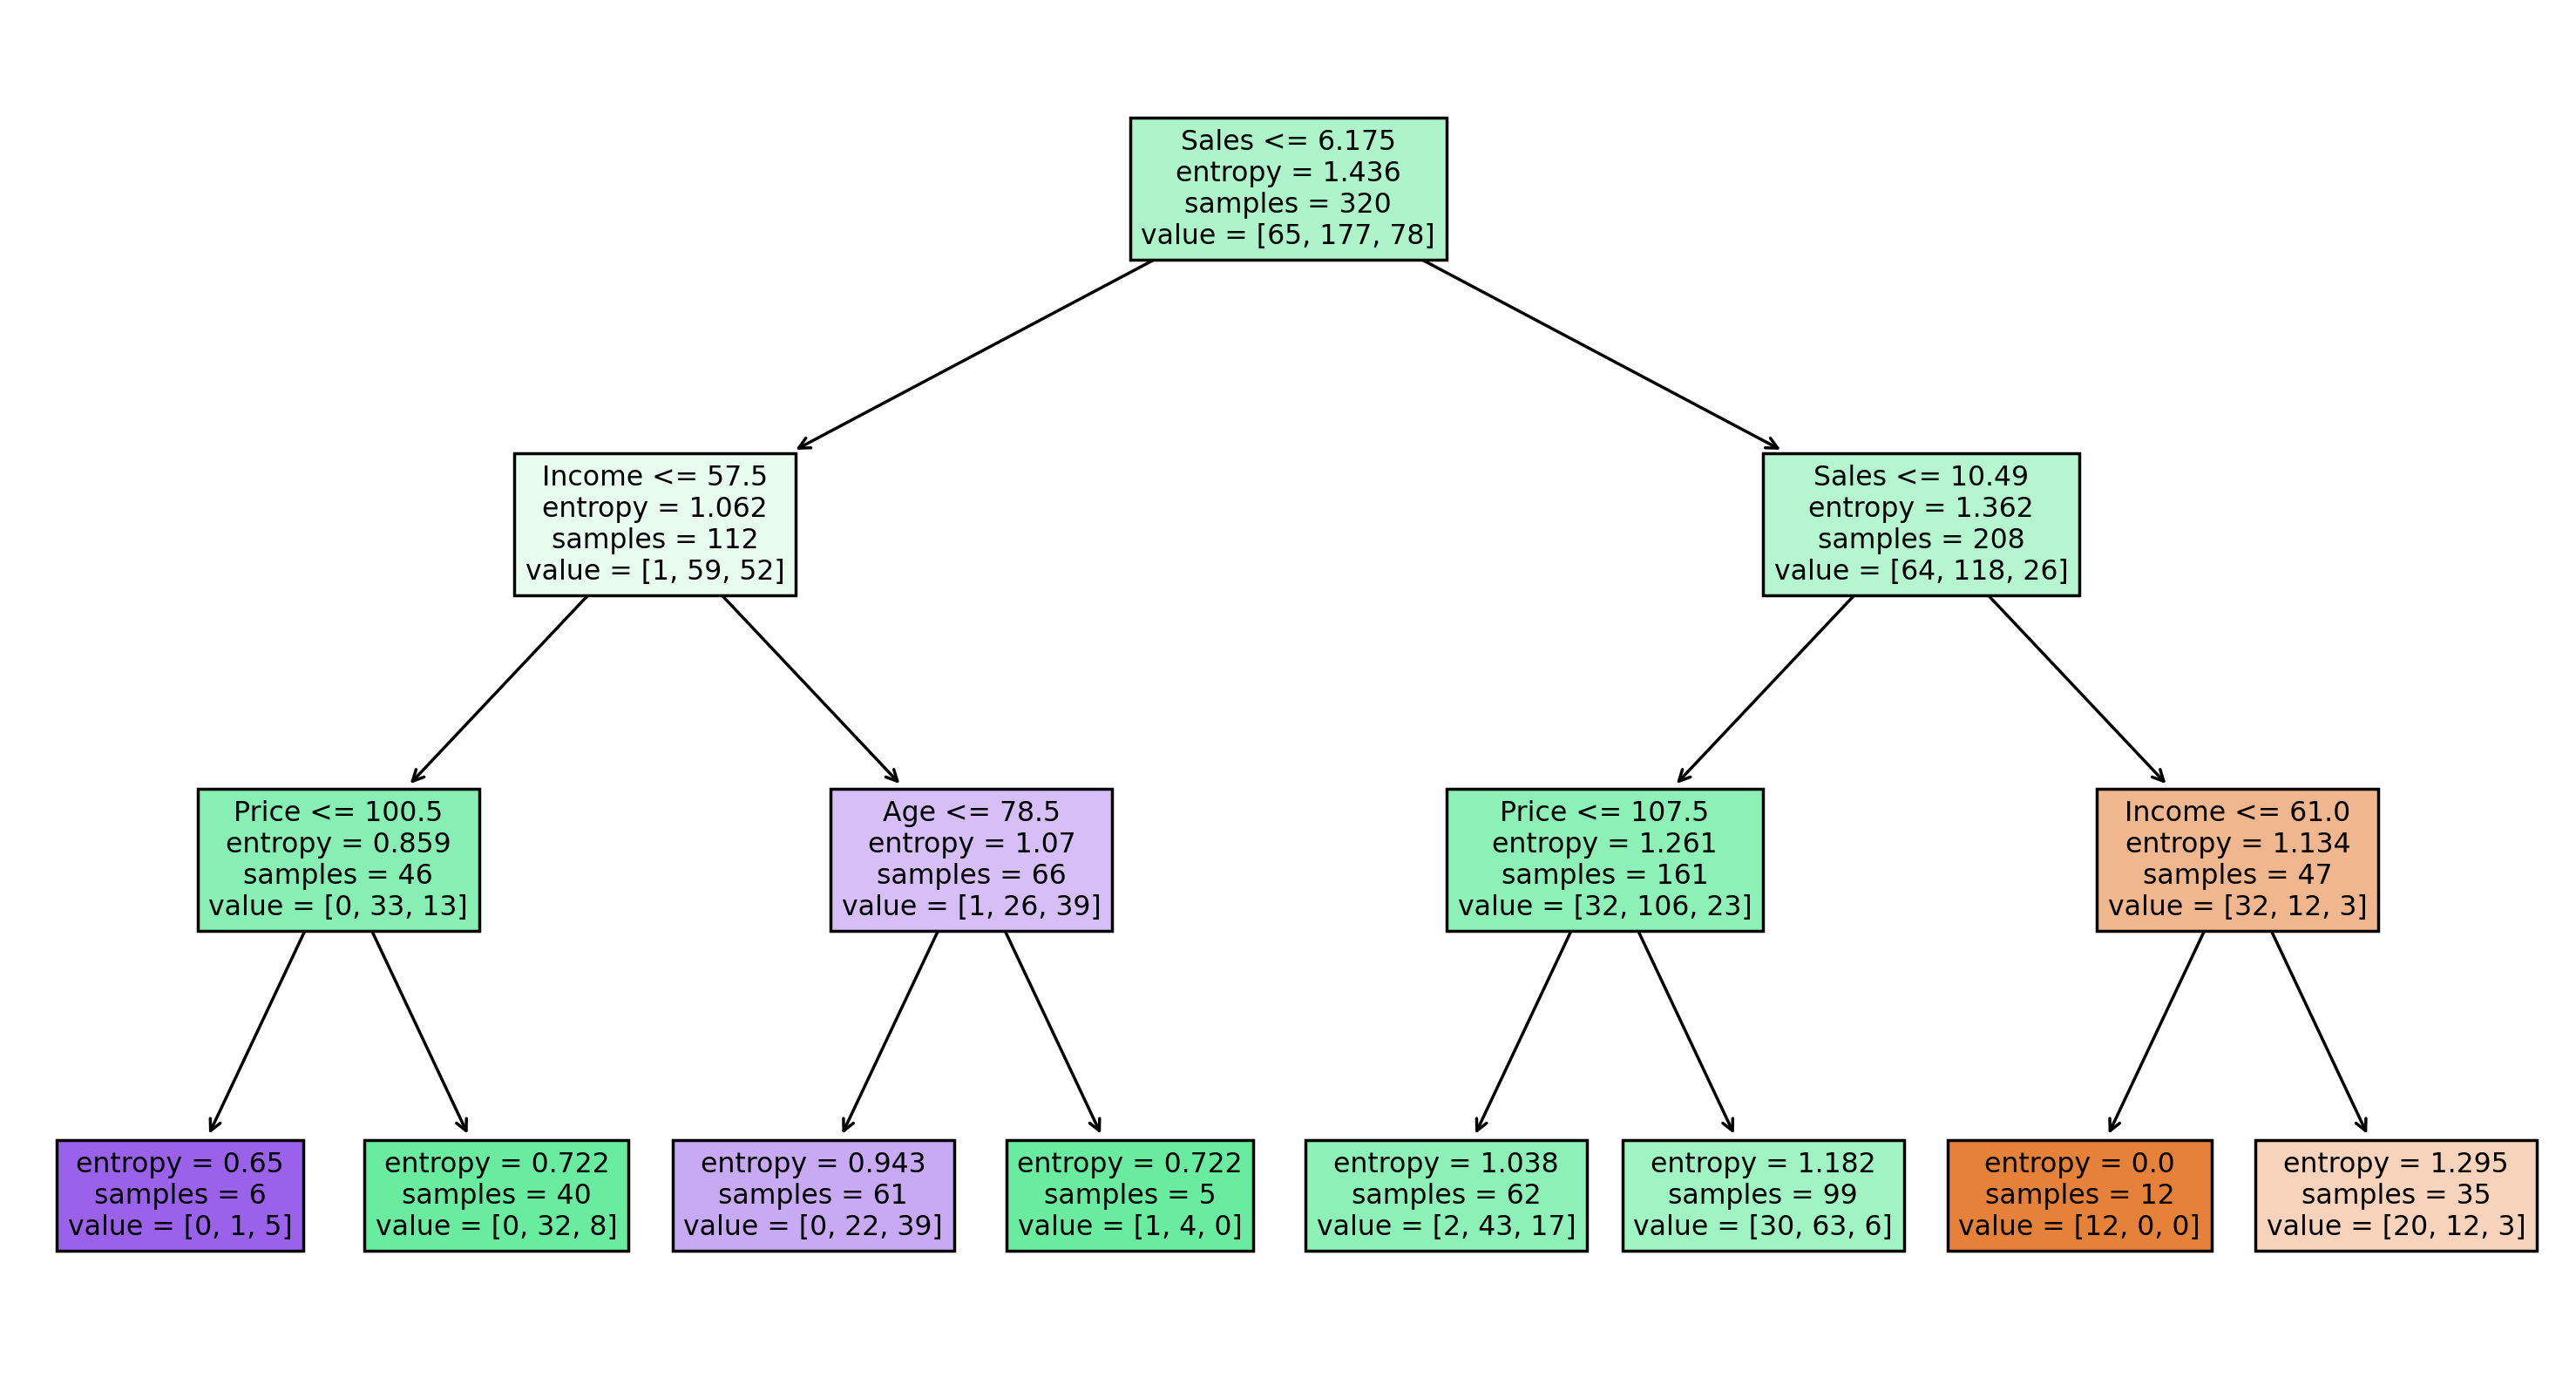

In [26]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)

## -- CART approach

In [27]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [28]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

### Building Decision Tree Classifier using Gini Criteria

In [29]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

ypred

array([2, 2, 3, 2, 2, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 1, 3,
       3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3], dtype=int64)

In [30]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.61      0.55      0.58        20
           2       0.59      0.52      0.56        42
           3       0.48      0.67      0.56        18

    accuracy                           0.56        80
   macro avg       0.56      0.58      0.56        80
weighted avg       0.57      0.56      0.56        80



In [31]:
print(dt.score(xtrain, ytrain))
dt.score(xtest, ytest)

1.0


0.5625

**OverFit Model**

### HyperParameter Tuning

In [32]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [33]:
params = {
    'criterion' : ['gini'],
    'splitter' : ["best", "random"],
    'max_depth' : [1,2,3,4,5,6,7,8,9]
}

In [34]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid= params)

In [35]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

### Generalized model

In [36]:
dt = DecisionTreeClassifier(criterion= 'gini', splitter= 'best', max_depth= 2)
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

ypred

array([2, 2, 2, 2, 3, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2], dtype=int64)

In [37]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.77      0.50      0.61        20
           2       0.64      0.76      0.70        42
           3       0.53      0.50      0.51        18

    accuracy                           0.64        80
   macro avg       0.65      0.59      0.61        80
weighted avg       0.65      0.64      0.63        80



In [38]:
print(dt.score(xtrain, ytrain))
dt.score(xtest, ytest)

0.653125


0.6375

[Text(0.5, 0.8333333333333334, 'Sales <= 10.49\ngini = 0.593\nsamples = 320\nvalue = [65, 177, 78]'),
 Text(0.25, 0.5, 'Sales <= 5.29\ngini = 0.545\nsamples = 273\nvalue = [33, 165, 75]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.506\nsamples = 74\nvalue = [1, 32, 41]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 199\nvalue = [32, 133, 34]'),
 Text(0.75, 0.5, 'CompPrice <= 103.5\ngini = 0.467\nsamples = 47\nvalue = [32, 12, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.414\nsamples = 42\nvalue = [31, 8, 3]')]

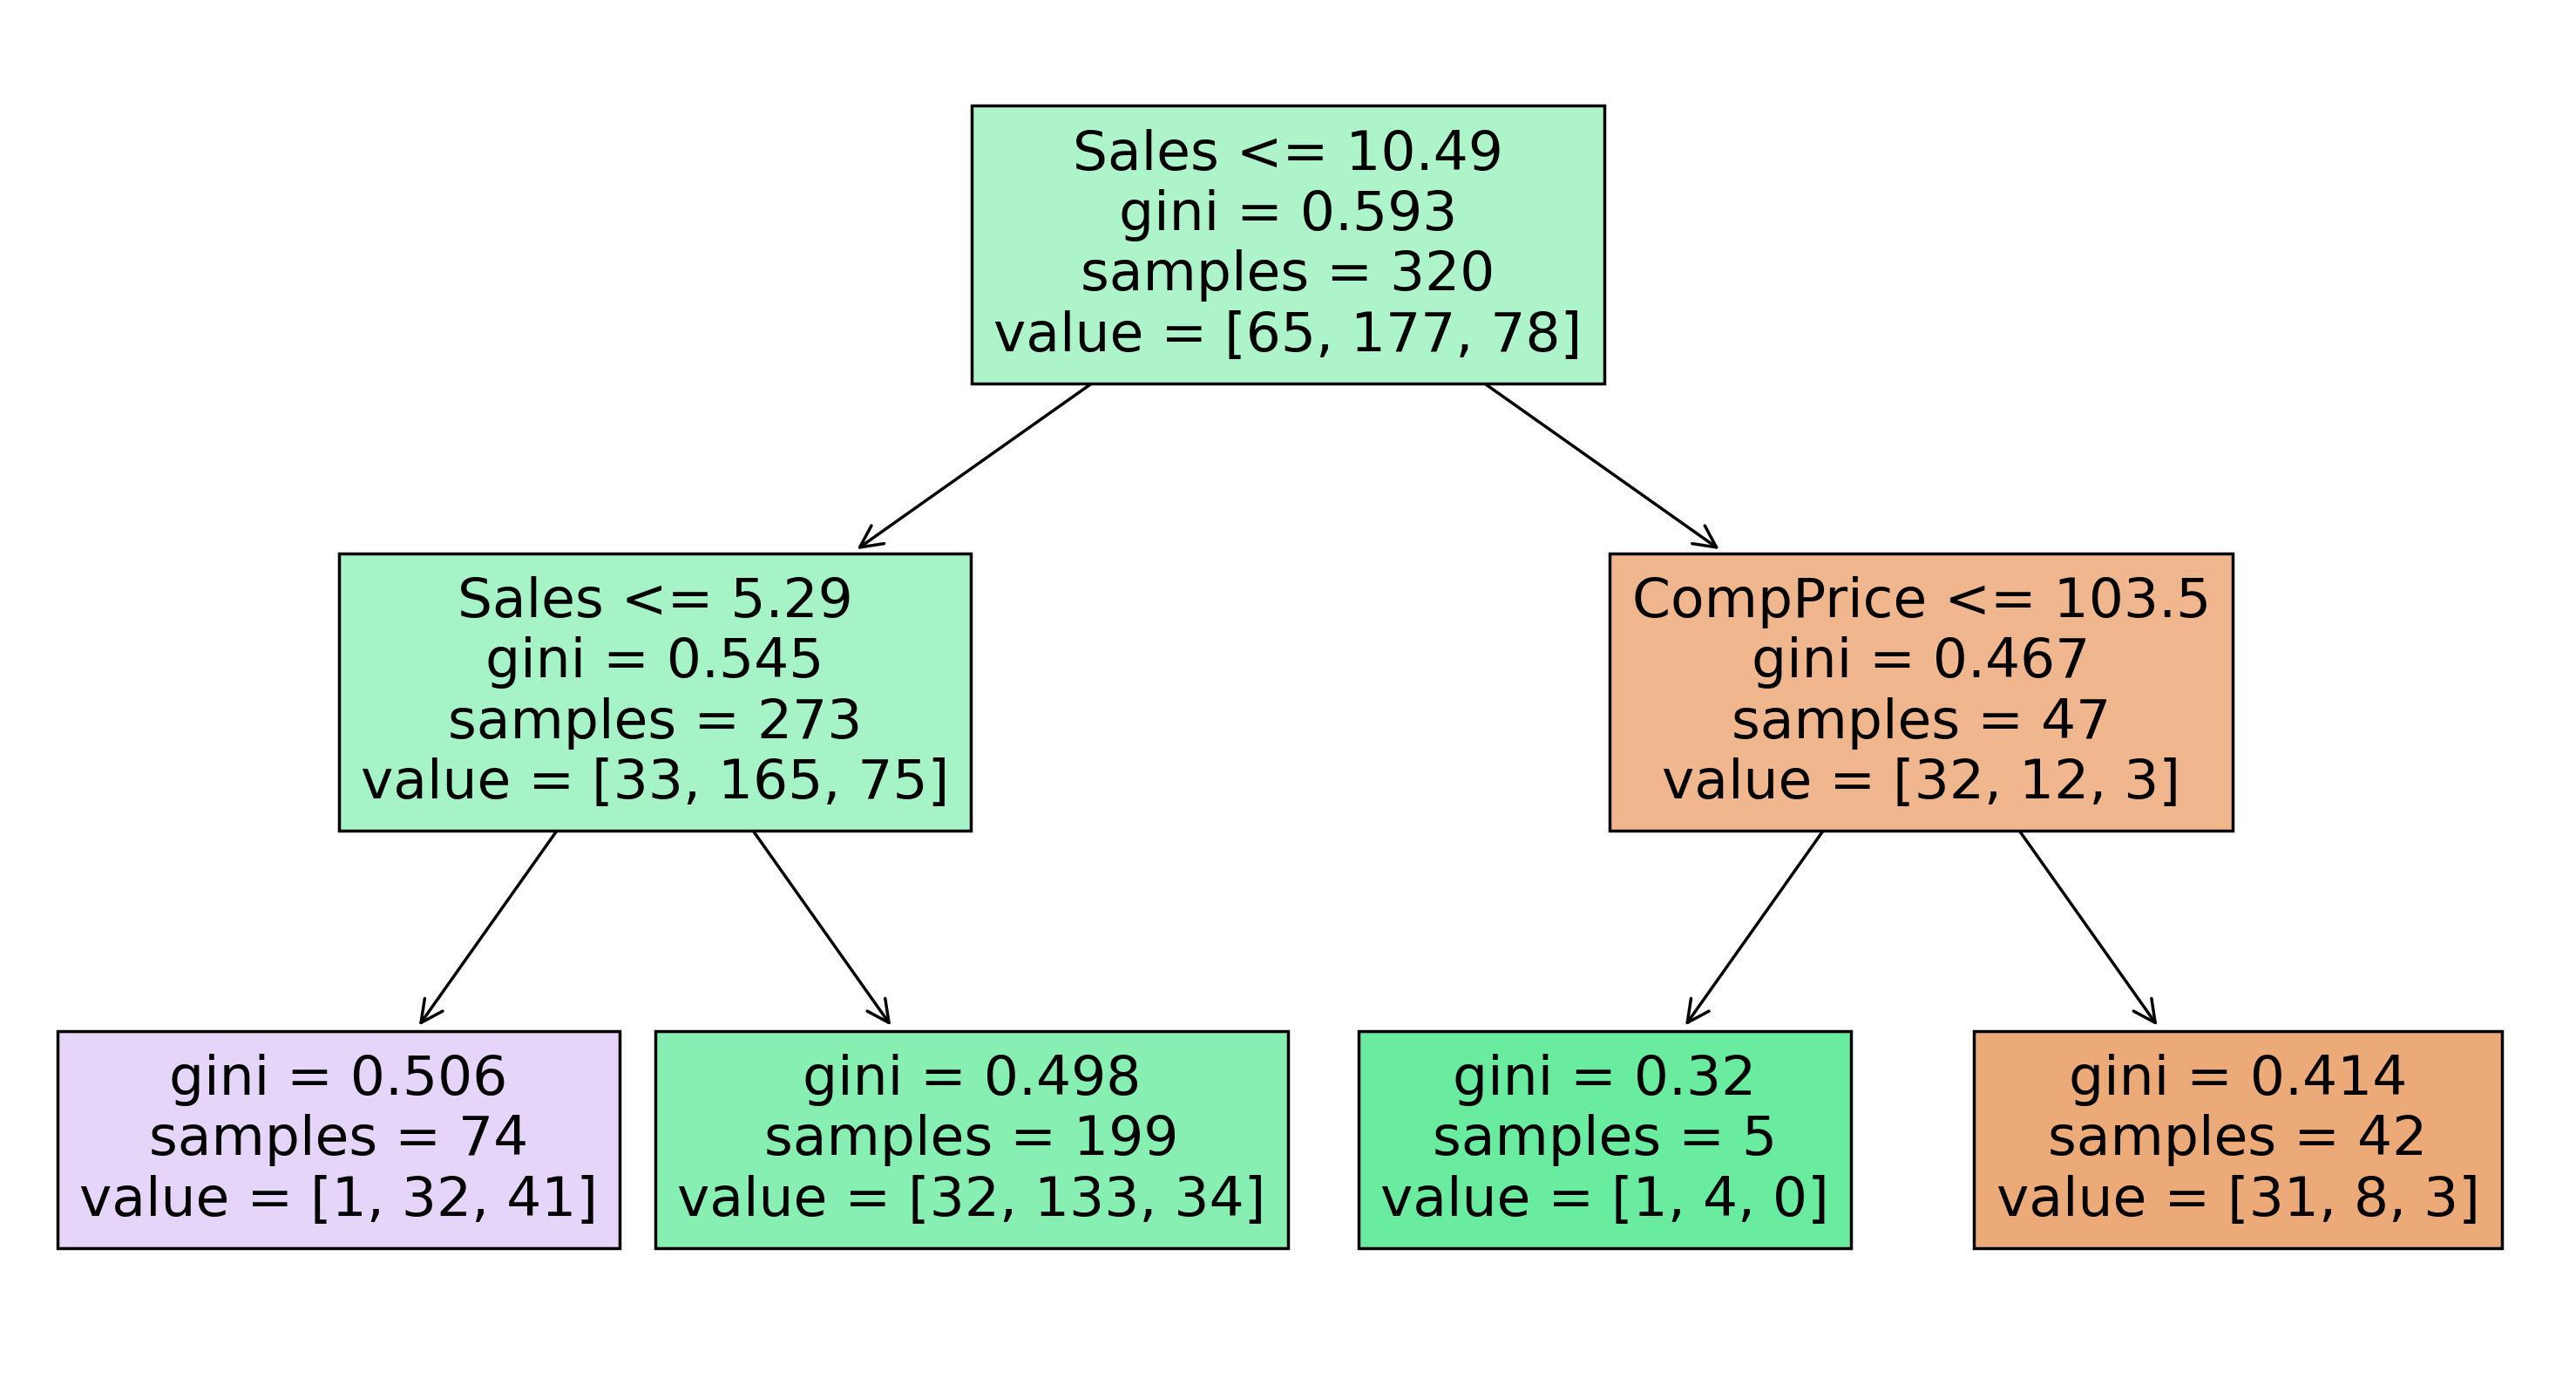

In [39]:
tree.plot_tree(dt, feature_names=x.columns, filled= True)

---------------------------------------------------------------------------------------------------------------------------

# (2) Fraud_Check 

##  C5.0 approach

In [40]:
df = pd.read_csv("D:\Assignment\Decision Trees\Fraud_check.csv")

In [41]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [42]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [44]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df = pd.get_dummies(df, columns= ['Undergrad', 'Marital.Status', 'Urban'],drop_first= True)

In [47]:
df.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of Taxable.Income <= 30000 for Risky and Good
conditions = [
    (df['Taxable.Income'] <= 30000),
    (df['Taxable.Income'] > 30000)
    ]

# create a list of the values we want to assign for each condition
values = ['Risky', 'Good']

# create a new column and use np.select to assign values to it using our lists as arguments
df['TaxInc'] = np.select(conditions, values)

# display updated DataFrame
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


***Lets assume: taxable_income <= 30000 as “Risky = 1” and others are “Good = 0”***

In [49]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [50]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Risky
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [51]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)

### Building Decision Tree Classifier using Entropy Criteria

In [53]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

ypred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [54]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        29

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [55]:
print(dt.score(xtrain, ytrain))
dt.score(xtest, ytest)

1.0


1.0

[Text(0.5, 0.75, 'Taxable.Income <= 30055.5\nentropy = 0.718\nsamples = 480\nvalue = [385, 95]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 95\nvalue = [0, 95]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 385\nvalue = [385, 0]')]

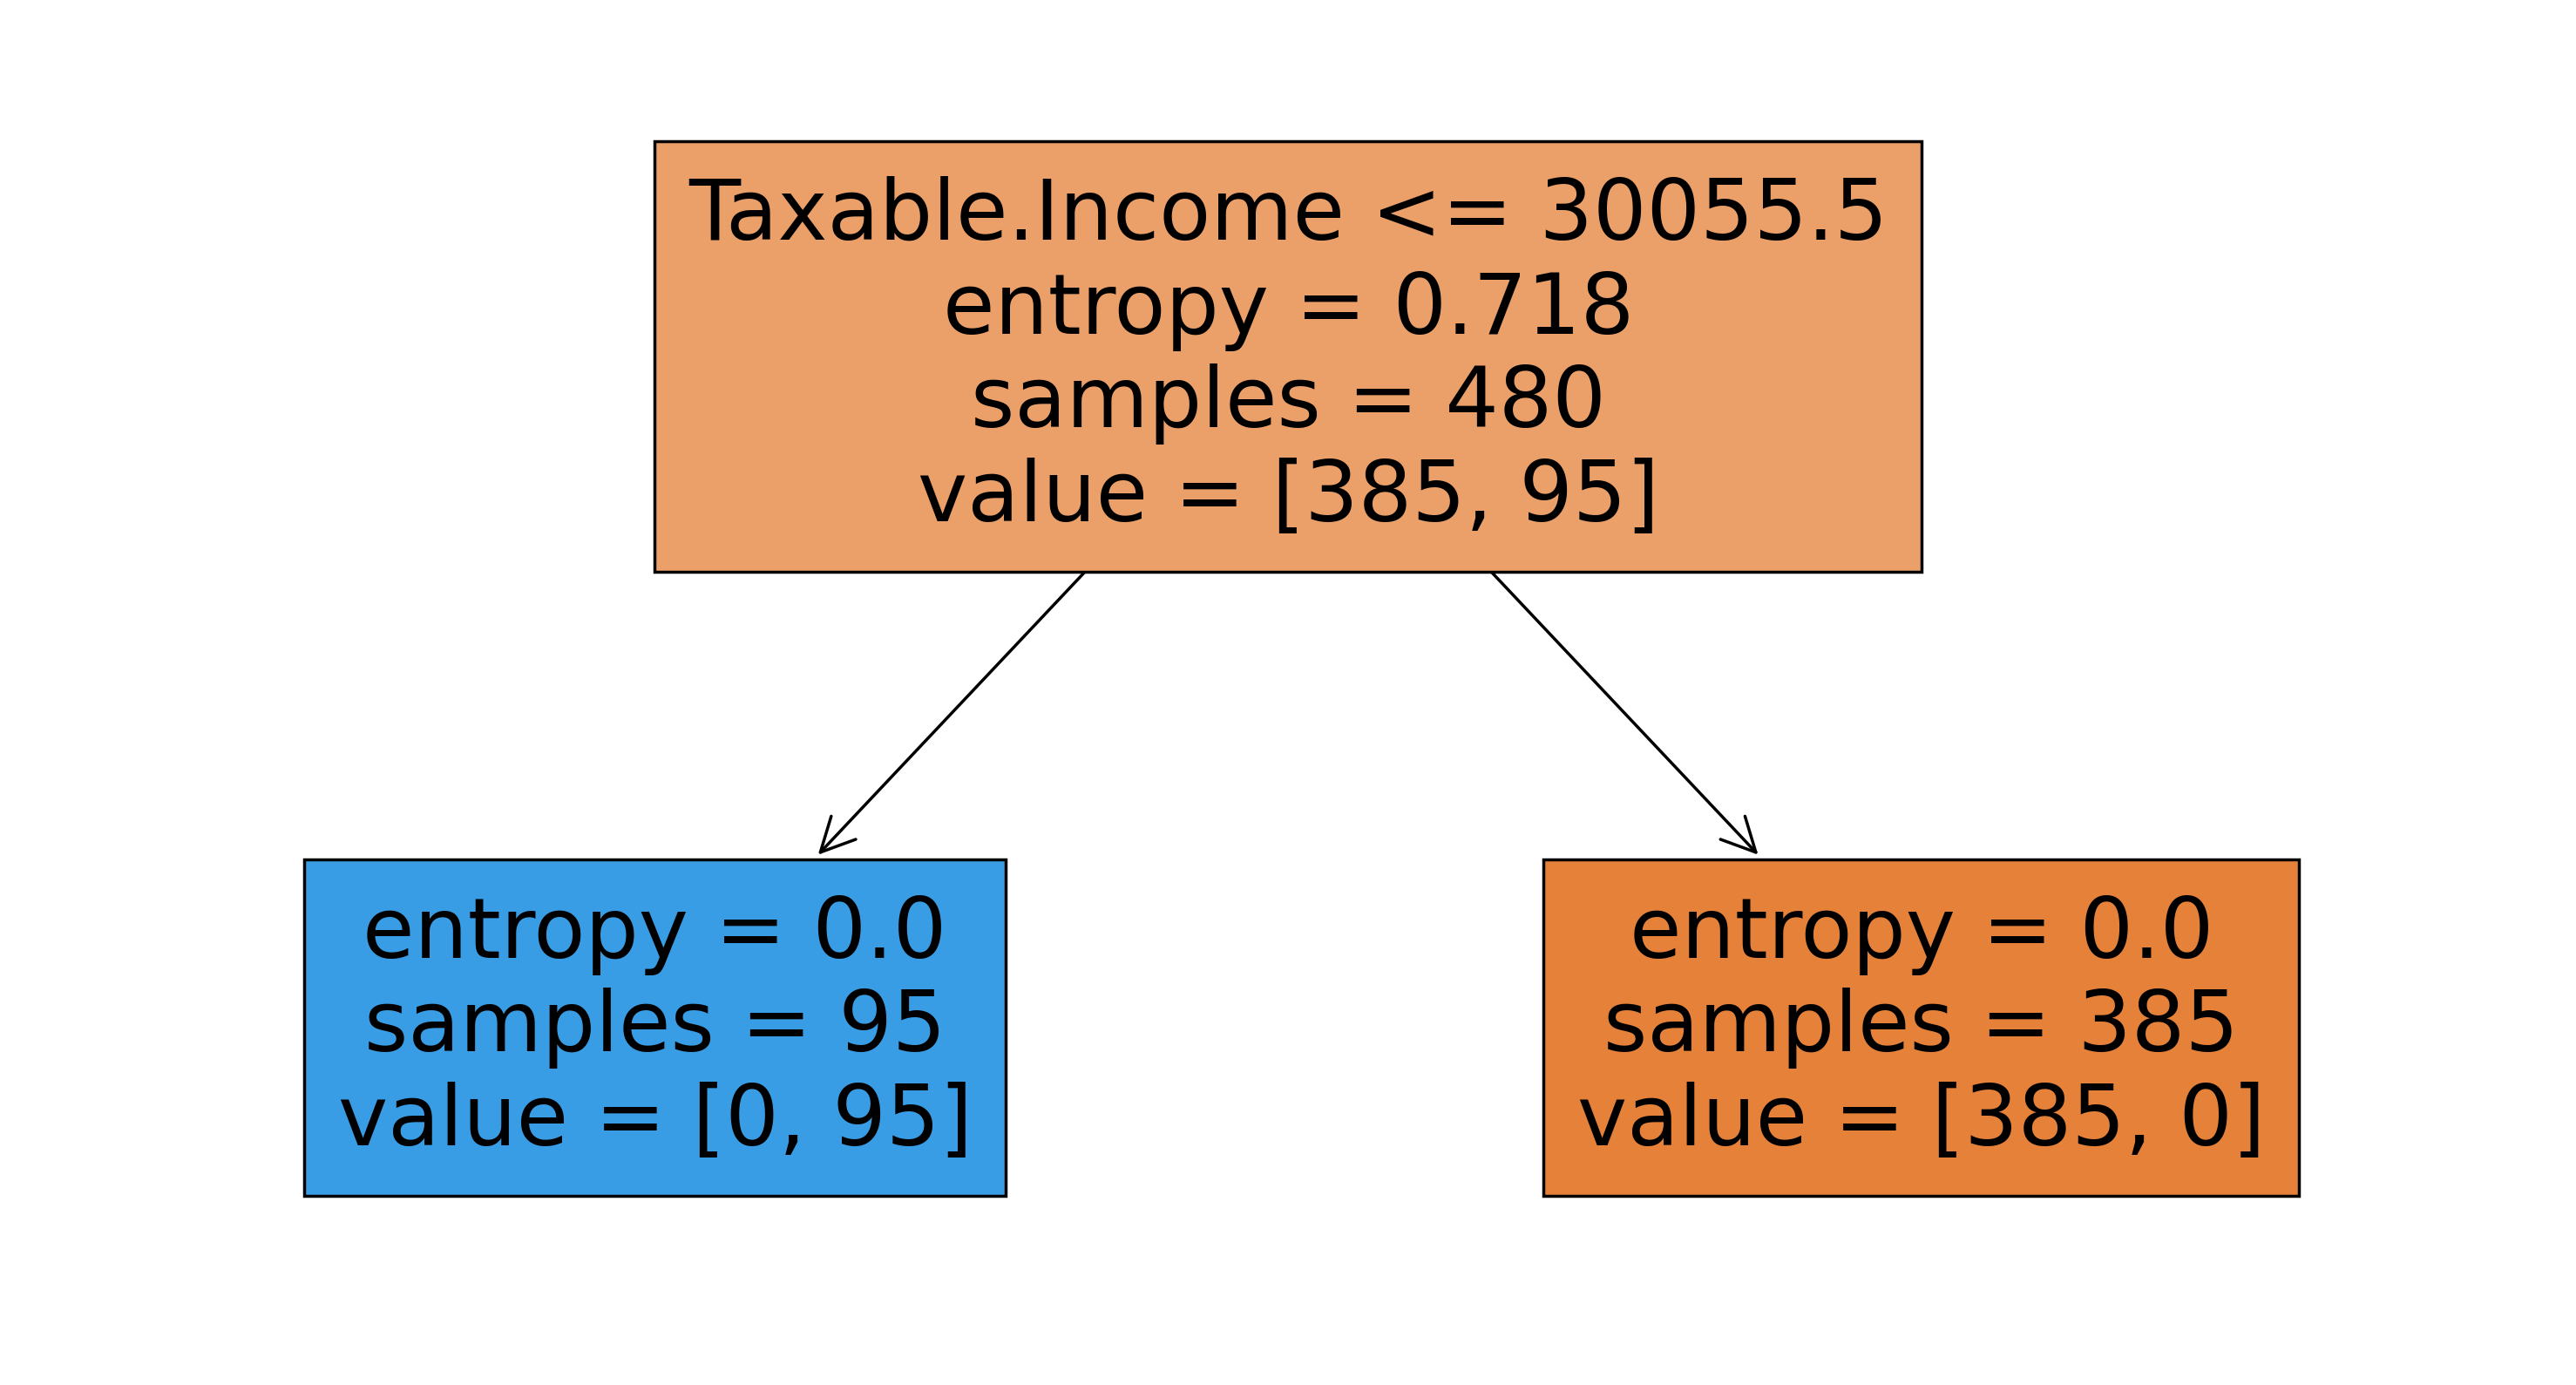

In [56]:
tree.plot_tree(dt,feature_names=x.columns, filled=True)

### Building Decision Tree Classifier using Gini Criteria

In [57]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

ypred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        29

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
print(dt.score(xtrain, ytrain))
dt